In [6]:
using LinearAlgebra, Printf
using FFTW, PyPlot

In [7]:
tol=1e-12;

In [8]:
# Make 3-d PPP operator 
function mkA_PPP(Nx,Ny,Nz)
 NN=Nx*Ny*Nz;
 A=zeros(NN,NN)
 # Modulo and offset for 1 based index
 MOD(i,n)=mod(i-1,n)+1
 OFF(i,j,k,ni,nj,nk)= (k-1)*ni*nj + (j-1)*ni + (i-1) + 1 
 for k=1:Nz
  for j=1:Ny
   for i=1:Nx
    ic=i ; iw=MOD(i-1,Nx); ie=MOD(i+1,Nx)
    jc=j ; js=MOD(j-1,Ny); jn=MOD(j+1,Ny)
    kc=k ; ku=MOD(k-1,Nz); kd=MOD(k+1,Nz)
    offc=OFF(i , j, k, Nx, Ny, Nz)
    offw=OFF(iw, j, k, Nx, Ny, Nz)
    offe=OFF(ie, j, k, Nx, Ny, Nz)
    offs=OFF( i,js, k, Nx, Ny, Nz)
    offn=OFF( i,jn, k, Nx, Ny, Nz)
    offu=OFF( i, j,ku, Nx, Ny, Nz)
    offd=OFF( i, j,kd, Nx, Ny, Nz)
    A[offc,offc]=-6
    A[offc,offw]= A[offc,offw]+1
    A[offc,offe]= A[offc,offe]+1
    A[offc,offs]= A[offc,offs]+1
    A[offc,offn]= A[offc,offn]+1
    A[offc,offu]= A[offc,offu]+1
    A[offc,offd]= A[offc,offd]+1         
   end
  end
 end
    
 return A, Nx, Ny, Nz, NN
end

APPP,Nx,Ny,Nz,NN=mkA_PPP(3,3,3);

A=APPP;
show(IOContext(stdout), "text/plain", Int.(Matrix(A)))

27×27 Array{Int64,2}:
 -6   1   1   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
  1  -6   1   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
  1   1  -6   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
  1   0   0  -6   1   1   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0
  0   1   0   1  -6   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0
  0   0   1   1   1  -6   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0
  1   0   0   1   0   0  -6   1   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0
  0   1   0   0   1   0   1  -6   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1   0
  0   0   1   0   0   1   1   1  -6   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1
  1   

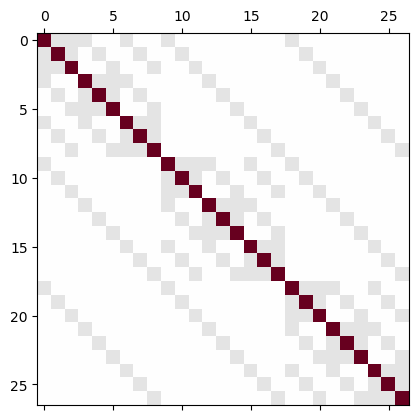

PyObject <matplotlib.image.AxesImage object at 0x7fc79cf8efd0>

In [17]:
ℓ = maximum(abs, A)
matshow(A, cmap="RdGy", vmin=-ℓ, vmax=ℓ)

In [19]:
# Make 3-d PPN operator 
function mkA_PPN(Nx,Ny,Nz)
 NN=Nx*Ny*Nz;
 A=zeros(NN,NN)
 # Modulo and offset for 1 based index
 MOD(i,n)=mod(i-1,n)+1
 OFF(i,j,k,ni,nj,nk)= (k-1)*ni*nj + (j-1)*ni + (i-1) + 1 
 for k=1:Nz
  for j=1:Ny
   for i=1:Nx
    ic=i ; iw=MOD(i-1,Nx); ie=MOD(i+1,Nx)
    jc=j ; js=MOD(j-1,Ny); jn=MOD(j+1,Ny)
    kc=k ; ku=MOD(k-1,Nz); kd=MOD(k+1,Nz)
    offc=OFF(i , j, k, Nx, Ny, Nz)
    offw=OFF(iw, j, k, Nx, Ny, Nz)
    offe=OFF(ie, j, k, Nx, Ny, Nz)
    offs=OFF( i,js, k, Nx, Ny, Nz)
    offn=OFF( i,jn, k, Nx, Ny, Nz)
    offu=OFF( i, j,ku, Nx, Ny, Nz)
    offd=OFF( i, j,kd, Nx, Ny, Nz)
    A[offc,offc]=-6
    A[offc,offw]= A[offc,offw]+1
    A[offc,offe]= A[offc,offe]+1
    A[offc,offs]= A[offc,offs]+1
    A[offc,offn]= A[offc,offn]+1
    if k == 1
     A[offc,offu]= A[offc,offu]+0
     A[offc,offc]= A[offc,offc]+1
     A[offc,offd]= A[offc,offd]+1   
    elseif k == Nz
     A[offc,offu]= A[offc,offu]+1
     A[offc,offc]= A[offc,offc]+1
     A[offc,offd]= A[offc,offd]+0   
    else
     A[offc,offu]= A[offc,offu]+1
     A[offc,offd]= A[offc,offd]+1 
    end
   end
  end
 end

 return A, Nx, Ny, Nz, NN
end

APPN,Nx,Ny,Nz,NN=mkA_PPN(3,3,3);

A=APPN;
show(IOContext(stdout), "text/plain", Int.(Matrix(A)))

27×27 Array{Int64,2}:
 -5   1   1   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  1  -5   1   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  1   1  -5   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  1   0   0  -5   1   1   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   1   0   1  -5   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   1   1   1  -5   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
  1   0   0   1   0   0  -5   1   1   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
  0   1   0   0   1   0   1  -5   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
  0   0   1   0   0   1   1   1  -5   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
  1   

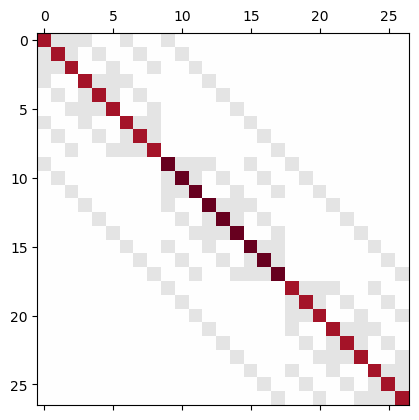

PyObject <matplotlib.image.AxesImage object at 0x7fc79cf01910>

In [20]:
ℓ = maximum(abs, A)
matshow(A, cmap="RdGy", vmin=-ℓ, vmax=ℓ)

In [26]:
# Show eigen vectors
E=eigen(A)
El=E.values
Ev=E.vectors

display(El)

# println("eigen vectors ")
# show(IOContext(stdout), "text/plain", Matrix(Ev) )
# println("\n")

27-element Array{Float64,1}:
 -9.0                  
 -8.999999999999998    
 -8.999999999999996    
 -8.999999999999993    
 -7.0                  
 -7.0                  
 -6.999999999999997    
 -6.9999999999999964   
 -6.000000000000005    
 -6.000000000000004    
 -6.000000000000001    
 -6.0                  
 -6.0                  
  ⋮                    
 -5.999999999999996    
 -4.0000000000000036   
 -4.000000000000003    
 -3.999999999999998    
 -3.999999999999995    
 -3.0000000000000115   
 -3.000000000000006    
 -2.999999999999998    
 -2.999999999999996    
 -2.9999999999999947   
 -0.9999999999999947   
  5.329070518200751e-15

In [27]:
# Create a RHS
N=size(A)[1]
f=rand(N,1);
# f=ones(N,1);
# f=[1/3 1/3 1/3]';
f=E.vectors[:,1];
display(reshape(f,Nx,Ny,Nz))

f=f.-sum(f)/N;
println(" f = ",f)
println(" L2(f)", sum(f.*f))

3×3×3 Array{Float64,3}:
[:, :, 1] =
 -0.07684   -0.0676878   0.144528
 -0.064185  -0.063196    0.127381
  0.141025   0.130884   -0.271909

[:, :, 2] =
  0.15368   0.135376  -0.289056
  0.12837   0.126392  -0.254762
 -0.28205  -0.261768   0.543818

[:, :, 3] =
 -0.07684   -0.0676878   0.144528
 -0.064185  -0.063196    0.127381
  0.141025   0.130884   -0.271909

 f = [-0.07684001514651317, -0.06418496869211571, 0.1410249838386289, -0.0676878184926784, -0.06319597528362308, 0.1308837937763015, 0.14452783363919158, 0.12738094397573882, -0.27190877761493026, 0.15368003029302627, 0.1283699373842313, -0.2820499676772574, 0.1353756369853567, 0.12639195056724606, -0.2617675875526027, -0.28905566727838283, -0.25476188795147725, 0.5438175552298601, -0.07684001514651288, -0.06418496869211544, 0.14102498383862846, -0.06768781849267817, -0.06319597528362285, 0.13088379377630105, 0.14452783363919117, 0.12738094397573838, -0.27190877761492993]
 L2(f)1.0


In [28]:
# Show FFT wave number amplitudes
fND=reshape(f,Nx,Ny,Nz)
ff=FFTW.fft(fND)
# println( ff        )
display( real.(ff .* conj.(ff)) )

3×3×3 Array{Float64,3}:
[:, :, 1] =
 4.33334e-32  2.81378e-31  2.81378e-31
 2.74252e-31  3.08149e-33  8.93631e-32
 2.74252e-31  8.93631e-32  3.08149e-33

[:, :, 2] =
 1.94712e-31  1.98178e-31  3.48401e-31
 2.65436e-31  3.31286      3.43714    
 3.10803e-31  3.43714      3.31286    

[:, :, 3] =
 1.94712e-31  3.48401e-31  1.98178e-31
 3.10803e-31  3.31286      3.43714    
 2.65436e-31  3.43714      3.31286    

In [29]:
# Solve Eigen style
F=(E.vectors)'*f;
println("f projected onto eigen vectors",F)
λ=E.values;
rλ=map(x -> if (abs(x)>tol) 1.0/x;  else 0. ; end , λ);
Φ=F.*rλ;
println("ϕ projected onto eigen vectors",Φ)
ϕ=(E.vectors)*Φ
println("ϕ (eigen vectors projected onto Φ)",ϕ)
println(A*ϕ)
println(f)
println(A*ϕ-f)

f projected onto eigen vectors[0.9999999999999999, 4.0766001685454967e-17, -2.5370330836160804e-17, -4.640385298237959e-17, -5.551115123125783e-17, -4.163336342344337e-17, -2.168404344971009e-18, -1.485356976305141e-17, -6.938893903907228e-18, -5.724587470723463e-17, 1.3877787807814457e-17, 1.734723475976807e-17, 2.0816681711721685e-17, -1.942890293094024e-16, 2.0816681711721685e-17, -3.382710778154774e-17, -4.163336342344337e-17, -2.0816681711721685e-17, 7.45931094670027e-17, 4.163336342344337e-17, 3.469446951953614e-17, 3.469446951953614e-17, -8.326672684688674e-17, 0.0, -7.632783294297951e-17, 6.938893903907228e-17, -1.5959455978986625e-16]
ϕ projected onto eigen vectors[-0.11111111111111109, -4.5295557428283305e-18, 2.8189256484623127e-18, 5.155983664708847e-18, 7.93016446160826e-18, 5.9476233462061954e-18, 3.097720492815728e-19, 2.121938537578774e-18, 1.1564823173178704e-18, 9.540979117872433e-18, -2.3129646346357423e-18, -2.8912057932946782e-18, -3.469446951953614e-18, 3.23815048

In [30]:
# Solve FFT style
function mkwaves(N,L)
 scyc=zeros(N,1); sneu=zeros(N,1);
 for i in 1:N
  scyc[i]=(2*sin((i-1)*π/N)/(L/N)).^2
  sneu[i]=(2*sin((i-1)*π/(2*(N)))/(L/N)).^2 
 end   
 return scyc, sneu
end

Lx=Nx;
Ly=Ny;
Lz=Nz;

# fz  = FFTW.r2r(f,FFTW.REDFT10,3)
# fxyz= FFTW.fft(fz,[1,2])

# fF1=FFTW.fft(reshape(f,Nx,Ny,Nz),[1,2]);
# fF2= FFTW.r2r(real.(fF1),FFTW.REDFT10)

fF1=FFTW.r2r(reshape(f,Nx,Ny,Nz),FFTW.REDFT10,3)
fF2= FFTW.fft(fF1,[1,2])

sxcyc, sxneu=mkwaves(Nx,Lx)
sycyc, syneu=mkwaves(Ny,Ly)
szcyc, szneu=mkwaves(Nz,Lz)
sx=sxcyc;
sy=sycyc;
sz=szneu;

# sx=sxneu;
# sy=syneu;

fFi=-fF2;

for i=1:Nx
 for j=1:Ny
  for k=1:Nz
   if i == 1 && j == 1 && k == 1
    fFi[i,j,k]=0;
   else
    fFi[i,j,k]=fFi[i,j,k]./(sx[i]+sy[j]+sz[k])
   end
  end
 end
end

fiF1=FFTW.ifft(fFi,[1,2])
fiF2=FFTW.r2r(real.(fiF1),FFTW.REDFT01,3)/(2*Nz)  
    
fiF=reshape(fiF2,Nx*Ny*Nz);
println(f)
println(A*fiF)
println(f./(A*fiF))

[-0.07684001514651317, -0.06418496869211571, 0.1410249838386289, -0.0676878184926784, -0.06319597528362308, 0.1308837937763015, 0.14452783363919158, 0.12738094397573882, -0.27190877761493026, 0.15368003029302627, 0.1283699373842313, -0.2820499676772574, 0.1353756369853567, 0.12639195056724606, -0.2617675875526027, -0.28905566727838283, -0.25476188795147725, 0.5438175552298601, -0.07684001514651288, -0.06418496869211544, 0.14102498383862846, -0.06768781849267817, -0.06319597528362285, 0.13088379377630105, 0.14452783363919117, 0.12738094397573838, -0.27190877761492993]
[-0.07684001514651319, -0.06418496869211572, 0.14102498383862885, -0.06768781849267842, -0.06319597528362303, 0.1308837937763015, 0.14452783363919158, 0.1273809439757388, -0.2719087776149302, 0.15368003029302627, 0.12836993738423125, -0.28204996767725726, 0.13537563698535673, 0.12639195056724595, -0.26176758755260265, -0.2890556672783829, -0.25476188795147714, 0.54381755522986, -0.07684001514651286, -0.06418496869211543, 0